In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats.stats import pearsonr
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns

# Get data

In [2]:
data_array = pd.read_csv('Churn_Modelling.csv',delimiter=',')

In [3]:
data_array

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,3,2,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,3,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,1,2,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [4]:
del data_array["RowNumber"]
del data_array["Surname"]
del data_array["CustomerId"]
data_array

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,3,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,3,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,2,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


# Distribution of data

In [5]:
variables=["CreditScore", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

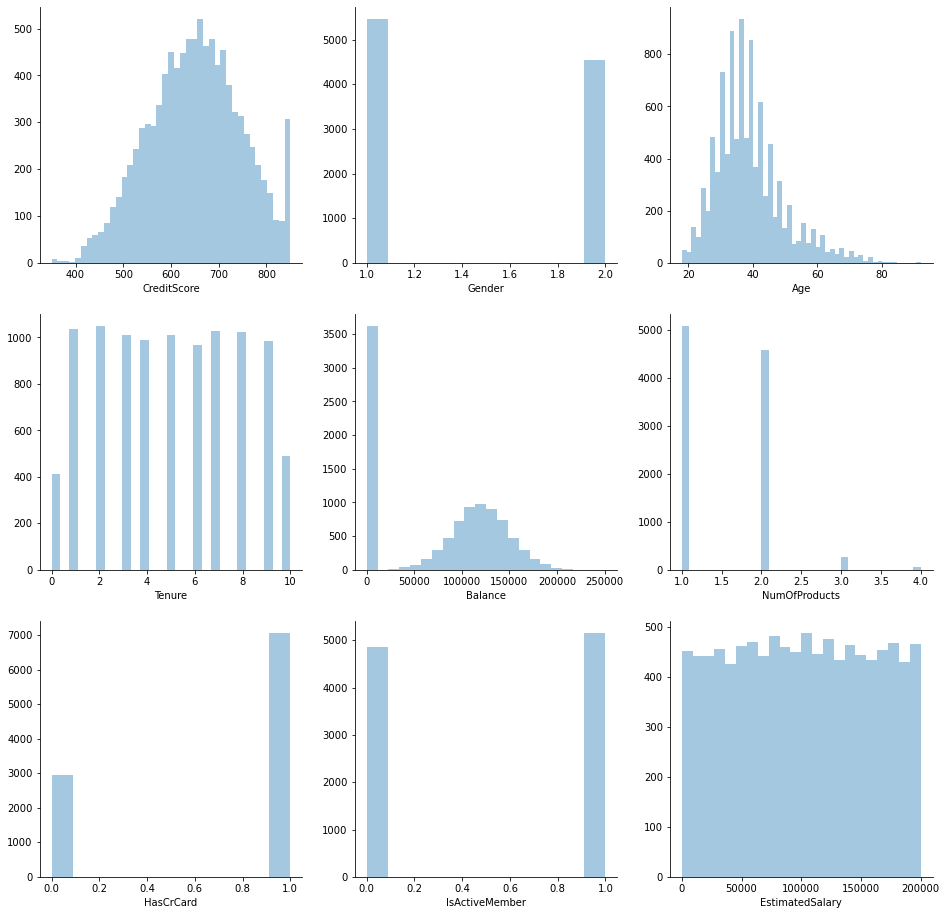

In [6]:
fig, ax = plt.subplots(figsize=(16,16))
for i in range(len(variables)):
    plt.subplot(3,3,i+1)
    x=data_array[variables[i]]
    sns.distplot(x, kde=False)
    sns.despine()

# Find and drop anomalies

In [7]:
q_hi  = data_array["Age"].quantile(0.99)
q_low  = data_array["CreditScore"].quantile(0.01)
data_array = data_array[(data_array["Age"] < q_hi) & (data_array["CreditScore"] > q_low)]
data_array = data_array[(data_array["NumOfProducts"] < 4)]
data_array

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,3,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,3,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,2,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


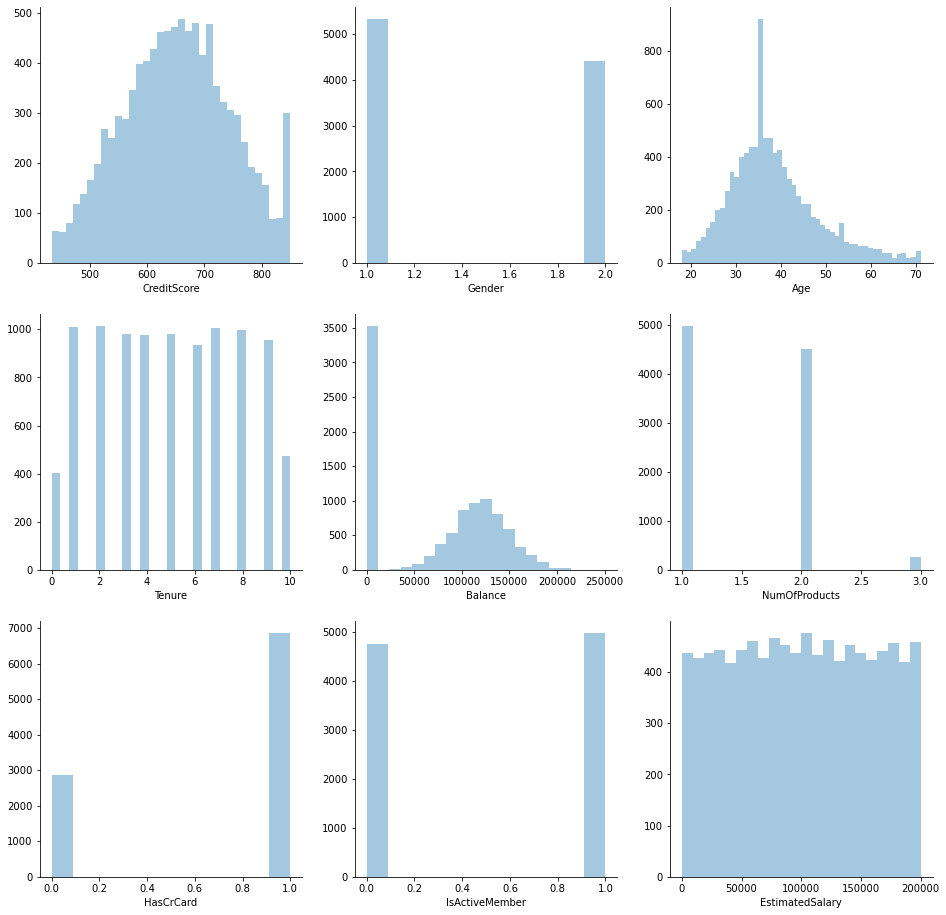

In [8]:
fig, ax = plt.subplots(figsize=(16,16))
for i in range(len(variables)):
    plt.subplot(3,3,i+1)
    x=data_array[variables[i]]
    sns.distplot(x, kde=False)
    sns.despine()

# Correlation

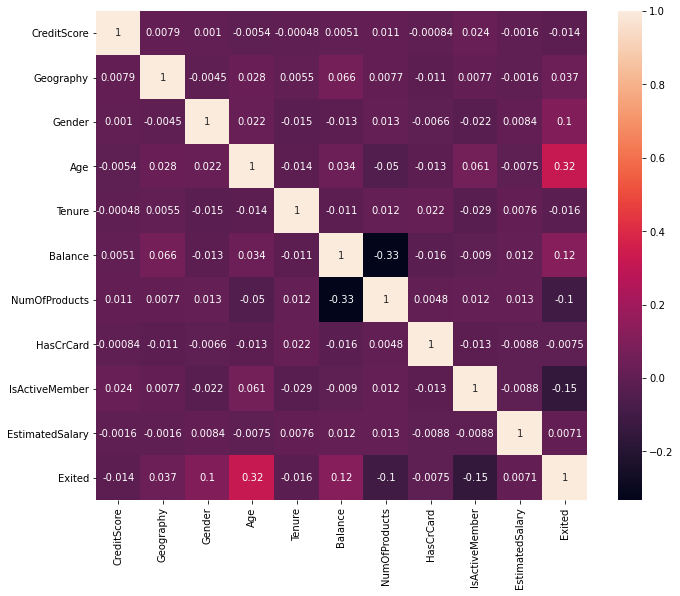

Exited             1.000000
Age                0.320240
Balance            0.115494
Gender             0.103424
Geography          0.036821
EstimatedSalary    0.007108
HasCrCard         -0.007544
CreditScore       -0.014402
Tenure            -0.016145
NumOfProducts     -0.104849
IsActiveMember    -0.152745
Name: Exited, dtype: float64

In [9]:
fig, ax = plt.subplots(figsize=(11,9))
correl = data_array.corr()
sns.heatmap(correl,annot=True)
plt.show()
correl["Exited"].sort_values(ascending=False)

In [10]:
del data_array["HasCrCard"]
del data_array["Tenure"]
del data_array["EstimatedSalary"]
del data_array["CreditScore"]
del data_array["Geography"]
data_array

,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,2,42,0.00,1,1,1
1,2,41,83807.86,1,1,0
2,2,42,159660.80,3,0,1
3,2,39,0.00,2,0,0
4,2,43,125510.82,1,1,0
...,...,...,...,...,...,...
9995,1,39,0.00,2,0,0
9996,1,35,57369.61,1,1,0
9997,2,36,0.00,1,1,1
9998,1,42,75075.31,2,0,1


# Scale

In [11]:
variables=["Gender", "Age", "Balance", "NumOfProducts", "IsActiveMember"]
scaler = StandardScaler()
data_array[variables] = scaler.fit_transform(data_array[variables])
data_array

,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,1.099457,0.360435,-1.225139,-0.936681,0.977443,1
1,1.099457,0.258430,0.117592,-0.936681,0.977443,0
2,1.099457,0.360435,1.332874,2.694382,-1.023078,1
3,1.099457,0.054419,-1.225139,0.878850,-1.023078,0
4,1.099457,0.462440,0.785738,-0.936681,0.977443,0
...,...,...,...,...,...,...
9995,-0.909540,0.054419,-1.225139,0.878850,-1.023078,0
9996,-0.909540,-0.353601,-0.305989,-0.936681,0.977443,0
9997,1.099457,-0.251596,-1.225139,-0.936681,0.977443,1
9998,-0.909540,0.360435,-0.022317,0.878850,-1.023078,1


# Learning and predicting

In [12]:
data_without_y = data_array.copy()
del data_without_y["Exited"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data_without_y,     
                                                    data_array['Exited'].values, 
                                                    train_size=0.5)

# Tree

In [14]:
tree_clf = tree.DecisionTreeClassifier(criterion='entropy')
tree_clf = tree_clf.fit(x_train, y_train)
y_pred=tree_clf.predict(x_test)
pd.DataFrame({"true":y_test, "pred":y_pred})

,true,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4861,0,0
4862,1,1
4863,0,0
4864,1,1


In [15]:
accuracy_score(y_test, y_pred)

0.8012741471434444

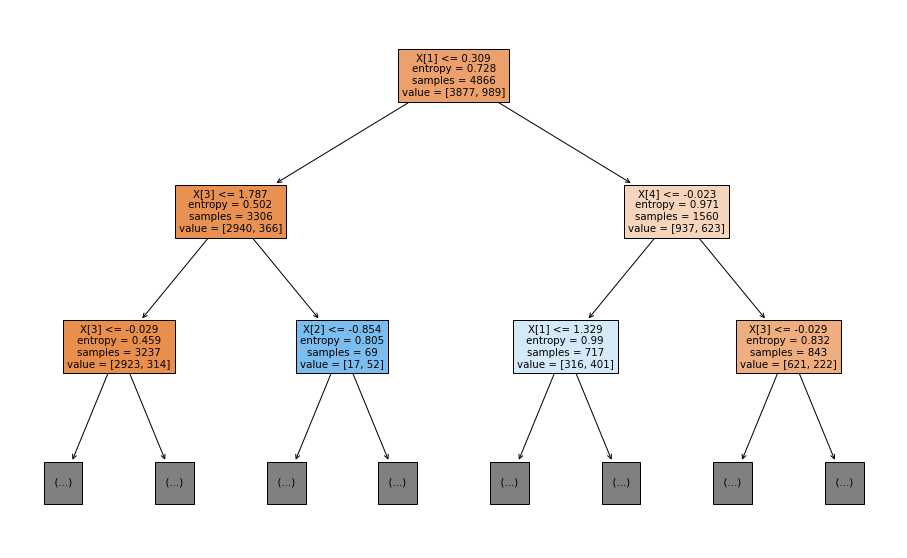

In [16]:
plt.figure(figsize=(16,10))
tree.plot_tree(tree_clf, max_depth=2, filled = True)
plt.show()

# Forest

In [17]:
for i in range (2,20):
    forest_clf = RandomForestClassifier(n_estimators = i, criterion='entropy')
    forest_clf = forest_clf.fit(x_train, y_train) 
    y_pred=forest_clf.predict(x_test)
    print(i, "  trees   =>   accuracy = ", accuracy_score(y_test, y_pred))

2   trees   =>   accuracy =  0.821619399917797
3   trees   =>   accuracy =  0.8148376489930127
4   trees   =>   accuracy =  0.8257295519934238
5   trees   =>   accuracy =  0.8210028771064529
6   trees   =>   accuracy =  0.8286066584463625
7   trees   =>   accuracy =  0.8263460748047677
8   trees   =>   accuracy =  0.8339498561446773
9   trees   =>   accuracy =  0.8306617344841759
10   trees   =>   accuracy =  0.8296341964652693
11   trees   =>   accuracy =  0.8267570900123304
12   trees   =>   accuracy =  0.8374434854089602
13   trees   =>   accuracy =  0.8279901356350184
14   trees   =>   accuracy =  0.8308672420879573
15   trees   =>   accuracy =  0.8308672420879573
16   trees   =>   accuracy =  0.8335388409371147
17   trees   =>   accuracy =  0.8333333333333334
18   trees   =>   accuracy =  0.8347718865598027
19   trees   =>   accuracy =  0.8323057953144266
